# Introduction to Neural Networks

In this lecture, we present and use the neural network paradigm, which has been central in the development of modern machine learning. We begin with a brief introduction of pioneering models that set the basis for the existence of neural networks. Then we introduce the feedforward neural network as the basic structure of the modern field of deep learning, and we outline all the design decisions that one should take in dealing with this type of model. 

## A bit of history : Early models

The idea of a biologically inspired model comes from McCulloch and Pitts, 1943, which presents a simple mathematical model that tries to mimic the work of the neuron in the complex structure of the human brain. The figure below shows the method of operation of the artificial neuron, which accepts binary values as input and produces a single binary output according to a certain threshold. Two different functions operate on the binary inputs: a function $g\left(x_{1}, x_{2}, x_{3}, \ldots, x_{n}\right)=g(\mathbf{x})=\sum_{i=1}^{n} x_{i}$, which sums all the binary values of the input, and a function $f(g(\mathbf{x}))$ which returns one if the aggregated sum is greater than $\theta$, otherwise zero.

<img src="images/artificial_neuron.png" width="400">

An extension of this model is provided by the perceptron of Rosenblatt, 1958. Such model can work with either a binary or a non-binary vector of input values $\mathbf{x}$ and computes a weighted sum $g(\mathbf{x}, \mathbf{w})=$ $\sum_{i=1}^{n} w_{i} x_{i}$ using the vector of weights $\mathbf{w}$, before applying a similar threshold $\theta$ as in the artificial neuron model.


<img src="images/perceptron.jpg" width="400">


The scalar parameter $\theta$ controls the neuron's activation and allows representing a linearly separable function of the data. Being linearly separable means that a hyperplane exists that splits the input space into two parts, containing all the points of a specific class. It is said in this case that there is a line that can perfectly separate all the data points. Minsky and Papert, 1969 criticizes this type of model because they are not able to classify data points that are not linearly separable. In this regard, the artificial neuron and the perceptron can model several functions of binary values, also called Boolean functions, but they fail, for example, with the exclusive-or (XOR) function. This operation on binary values $x_{1}$ and $x_{2}$ returns one when either $x_{1}=1$ or $x_{2}=1$, otherwise returns zero. This set of data is not linearly separable, as clarified inthe figure below, since there is no line in the two-dimensional space that can separate the two classes of outputs.


<img src="images/XOR.png" width="400">

The limitation of these models is the possibility to assume just binary output values ( 0 or 1$)$ due to the threshold $\theta$. In the case of $x_{1}=0\left(x_{1}=1\right)$, we should expect the model output to increase (decrease) with the other data point $x_{2}$. This is not possible with the perceptron because the model assumes the weight $w_{2}$ to be fixed independently of the value of $x_{1}$. The $\mathrm{XOR}$ case is often representative of a class of more complex problems that a linear classifier is not able to solve, such as nonlinear pattern recognition, combinatorial game theory and cryptography. For this purpose, a feedforward neural network comes in help, as outlined in the next section.

# Feedforward Neural Networks

Feedforward neural networks represent a turning point for the development of modern machine learning models. All the three machine learning paradigms described in Section $1.1$ widely employ these models. To provide a clear explanation, we introduce the neural network models in the supervised learning framework. 'Then, in the next chapter, we will describe their use in a reinforcement learning context.

Recalling the aim of a supervised learning model to learn the mapping $y=f(\mathbf{x})$, i.e. learning the output $y$ by exploiting the data points contained in $\mathbf{x}$, neural networks are able to learn a parametrization of the unknown function $f(\mathbf{x})$ through a set of parameter $\theta$, so that the mapping becomes


$$y=f(\mathbf{x} ; \theta)$$.

<img src="images/feedNN.jpg" width="400">

The figure above provides a visualization of the basic structure of a multilayer feedforward neural network. It partially resembles the structure of a perceptron, hence the name multilayer perceptron, which is sometimes used in place of a feedforward neural network. As the name suggests, one of the differences from the model of Rosenblatt, 1958 is the presence of an intermediate layer, called the hidden layer. The architecture of a neural network includes an input layer, which is the first set of neurons on the left, already present in the original perceptron. Then there is a hidden layer, whose elements are connected by directed edges to all the elements of the input layer and all the elements of the subsequent output layer. Edges represent the parameters $\theta$ to approximate the desired function.
We refer to this model as feedforward because of the way that information flows from input to output since there is no recursion at any point and no feedback loop that connects the previous outputs to the current inputs. Since each unit, also called a neuron, receives information from all the neurons in the previous layer, one can think of a layer as a function that takes a vector as input and returns another vector as output. The former vector has a dimension equal to the number of neurons in the previous layer and the latter equal to the number of neurons in the current layer.

The formulation in terms of neurons that elaborate and aggregate information motivates the adjective neural, because of the loose biological inspiration already present in the first formulation of these models. The number of units per layer varies depending on the task and assume different meaning depending on the layer. Increasing the units in the input layer means that the model can access more information, i.e., each vector $\mathrm{x}$ in the set of training examples $\left\{\mathrm{x}_{1}, \ldots, \mathrm{x}_{M}\right\}$ contains more information. The number of units in the output layer strictly depends on what the neural network wants to achieve. The dimension of the corresponding labels $y$, which can be either a scalar or a vector, already provides information about the size of these two layers, defining respectively a single output or a multi-output neural network. On the contrary, the number of hidden layer units may increase the model capacity, but it is not directly related to the dataset that the model experiences.

We remark that the figure above represents a composition of different functions like $f(\mathbf{x})=\left(f_{3} \circ f_{2} \circ f_{1}\right)(\mathbf{x})$, where $f_{1}, f_{2}$ and $f_{3}$ are respectively the function describing the input, the hidden and the output layer. The name network comes from the opportunity to represent this expression as a directed graph.


Many other hidden layers can be stacked to compose the function, hence defining the depth of the model. Therefore, feedforward neural networks with many hidden layers, and possibly wide, i.e., with many neurons, are generally considered as deep learning models.

## Advantages 

A feedforward neural network overcomes the perceptron's limits, which can only learn a linearly separable function of the data by returning only one of two values $(0$ or 1$)$ because of the hard-limit threshold function. Instead, a neural network not only produces a different representation of the input space through hidden layers but can also output real values. The former characteristics allow learning a broader set of functions of the inputs that are nonlinear in the neural network parameters.

We can think about the set of these parameters used to approximate the function as composed of two distinct subsets: $\psi$ that helps find the new representation on the feature space and $\omega$ for the output layer activation. The approximation becomes $y=f(\mathbf{x} ; \theta)=f(\mathbf{x} ; \psi, \omega)=\theta(\phi(\mathbf{x} ; \psi) ; \omega)$, where the function $\phi$ is the learned mapping from the input space to the new feature space and the function $\theta$ is the activation function applied in the output layer. Given this general form, we can distinguish two different tasks that a multilayer perceptron can perform. The first is the regression problem when the function $\theta$ is linear in the parameters $\omega$. This type of task consists of a generalization of a classical linear regression problem, where the linear model is applied to the input space learned by the hidden layers $\phi(\mathbf{x} ; \psi)$. The second one is the classification task when the function $\theta$ is nonlinear, and we need the neural network to output the probability distribution for all the possible outcomes of the problem.

The intermediate layers are called hidden because the training dataset does not suggest what these layers should do to elaborate the information, which is entirely retrieved by the mechanism used to learn the representation function $\phi$. Elaborating a new representation of the original input space is known to help the model reach a better generalization on the test set and solve previously impossible problems, such as the XOR one, by applying a linear model to a nonlinear transformation of the original data.

Nonetheless, linear models have limited capacity since they can represent only linear functions. Generally, they are solved through closed-form solutions or convex optimization methods. The introduction of nonlinearity in the neural network makes these methods more effective for solving the problem. For these reasons, neural networks are generally trained through gradient-based algorithms, which are methods employed for various machine learning models, especially when the dataset is quite large. Despite the differences in the optimization procedures, training a neural network requires some design choices similar to those required by a linear model, such as choosing an error function, otherwise called cost function, to optimize.


# Design choices and training

Neural Networks are usually employed to solve supervised learning problems. Suppose to have:
- A set of n-pairs $(x_1,y_1)...(x_n,y_n) \in \mathbb{X} \hspace{0.5em} x \hspace{0.5em} \mathbb{Y}$
-  The goal is to find a function
\begin{equation*}
    \hat{f}_{n}: \mathbb{X} \longrightarrow \mathbb{Y} 
\end{equation*}
such that, given a new unlabelled input $x \in \mathbb{X}$
\begin{equation*}
    \hat{f}_{n}(x) \approxeq y 
\end{equation*}
approximates well such unknown label.
- The resulting function $\hat{f}_{n} = f_{(x_1,y_1)...(x_n,y_n)}$ depends on the training set.

The supervised problem is solved once we have found $\{\hat{f}_{n}\}_{n \eqslantgtr 1}$ that maps
\begin{equation*}
    \hat{f}_{n} : (\mathbb{X} \hspace{0.5em} x \hspace{0.5em} \mathbb{Y})^{n} \longrightarrow \mathbb{Y}^{\mathbb{X}} \quad \quad (x_1,y_1)...(x_n,y_n) \longrightarrow \hat{f}_{n}
\end{equation*}
- Each pair $(x_i,y_i)$ is an example of the training set.
- $\mathbb{X}= \mathbb{R}^d$ is the input space and d is the number of features.
- $\mathbb{Y}=\mathbb{R}$ is the output space.
- the function $\hat{f}_{n}$ is the estimator, while the sequence $\{\hat{f}_{n}\}_{n \eqslantgtr 1}$ is the learning algorithm.

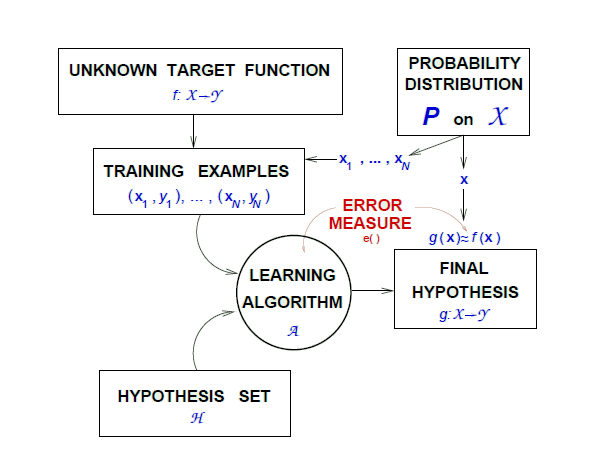

Below is presented the graph representation of a feedforward NN, whose main elements are:
- The layers.
- The activation function.
- The weight connections.

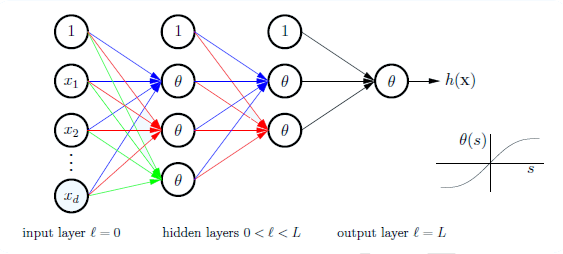

A supervised Neural Network usually perform:
- **The training process**: look at every pairs $\boldsymbol{D} = (x_1,y_1)...(x_N,y_N)$ and update the internal state of the network accordingly;

- Initialize the weight matrix $\boldsymbol{w}=[W^{(1)},W^{(2)},...,W^{(L)}]$ and the bias vector $\boldsymbol{b}=[b^{(1)},b^{(2)},...b^{(L)}]$;
-  Propagate forward by computing for l=1 until L: $$s^{(l)} = (W^{(l)})^{T}x^{(l-1)}$$ $$x^{(l)} = \left[\begin{array}{cc} 1  \\ \theta(s^{(l)}) \end{array}\right], ... , h(x)=x^{(L)}$$.

-  Choose a loss function $\boldsymbol{E}_{in}(w,b)$ and propagate back the errors through the network;
-  Update $\boldsymbol{w}$ according to a selected optimization algorithm.

- **The prediction process**: propagate forward the inputs using the learned parameters to return the most likely out

Find the minimum of an in-sample error surface requires an optimization algorithm that iteratively updates the matrix $\boldsymbol{w}$. One of the most common is the Stochastic Gradient Descent (SGD) $w(t+1) = w(t) - \eta \nabla E_{in}(w(t))$, where $\eta$ is a learning rate. 

**Backpropagation** algorithm allows to compute the gradients of $E_{in}$  by repeated applications of the chain rule. For every layer l, we have:
- $\frac{\partial E_{in}}{\partial W^{(l)}} = \frac{\partial E_{in}}{\partial s^{(l)}} \frac{\partial  s^{(l)}}{\partial W^{(l)} },$
- $\delta^{(l)} = \frac{\partial E_{in}}{\partial s^{(l)}}$, $x^{(l-1)} = \frac{\partial  s^{(l)}}{\partial W^{(l)} }$,
- $\nabla E_{in}(W_{t}^{(l)}) = x^{(l-1)}(\delta^{(l)})^T $,
- $W_{t+1}^{(l)} = W_{t}^{(l)} - \eta \nabla E_{in}(W_{t}^{(l)})$, where t is the number of the algorithm iteration.


# Let's look at the code

there are several packages that allows you to implement neural networks like those described above. It is interesting to see that we can use different tools and being able to manage them. This lecture should give you a grasp of similarities and differences among these tools.

The industry standard are `tensorflow` and `pytorch`, but you can now find many other packages that have been developed for a variety of reasons. `scikit-learn` is also able to do some MLP modeling even though is not quite used by researcher and practitioners.

## Getting started with the Tensorflow Sequential model
The `Sequential` model is a linear stack of layers.
You can create a `Sequential` model by passing a list of layer instances to the constructor:

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
model = Sequential([
                    Dense(32, input_dim=784),
                    Activation('relu'),
                    Dense(10),
                    Activation('softmax')
                    ])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


You can also simply add layers via the `.add()` method:

In [4]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

### Specifying the input shape
The model needs to know what input shape it should expect. For this reason, the first layer in a `Sequential` model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape through the `input_dim` parameter. 

In [5]:
model = Sequential()
model.add(Dense(32, input_dim=784))

### Compilation
Before training a model, you need to configure the learning process, which is done via the `compile` method. It receives three arguments:

* An optimizer. This could be the string identifier of an existing optimizer (such as `rmsprop` or `adagrad`), or an instance of the `Optimizer` class.
* A loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as `categorical_crossentropy` or `mse`), or it can be an objective function. 
* A list of metrics. For any classification problem you will want to set this to `metrics=['accuracy']`. A metric could be the string identifier of an existing metric or a custom metric function.

In [6]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

# For custom metrics
import tensorflow.keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])

### Training
Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the `fit` function.

In [7]:
# For a single-input model with 2 classes (binary classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((10000, 100))
labels = np.random.randint(2, size=(10000, 1))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
data.shape

(10000, 100)

In [9]:
labels.shape

(10000, 1)

In [10]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 0s 32us/sample - loss: 0.7020 - acc: 0.4938
Epoch 2/10
10000/10000 [==============================] - 0s 18us/sample - loss: 0.6943 - acc: 0.5093
Epoch 3/10
10000/10000 [==============================] - 0s 18us/sample - loss: 0.6936 - acc: 0.5115
Epoch 4/10
10000/10000 [==============================] - 0s 18us/sample - loss: 0.6915 - acc: 0.5218
Epoch 5/10
10000/10000 [==============================] - 0s 18us/sample - loss: 0.6908 - acc: 0.5277
Epoch 6/10
10000/10000 [==============================] - 0s 18us/sample - loss: 0.6898 - acc: 0.5345
Epoch 7/10
10000/10000 [==============================] - 0s 19us/sample - loss: 0.6886 - acc: 0.5386
Epoch 8/10
10000/10000 [==============================] - 0s 18us/sample - loss: 0.6869 - acc: 0.5460
Epoch 9/10
10000/10000 [==============================] - 0s 18us/sample - loss: 0.6849 - acc: 0.5532
Epoch 10/10
10000/10000 [==============================] - 

In [11]:
# For a single-input model with 10 classes (categorical classification):


model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

In [12]:
data.shape

(1000, 100)

In [13]:
labels.shape

(1000, 1)

In [14]:
labels

array([[9],
       [5],
       [0],
       [5],
       [2],
       [4],
       [1],
       [9],
       [6],
       [6],
       [7],
       [1],
       [9],
       [5],
       [2],
       [7],
       [0],
       [7],
       [9],
       [6],
       [4],
       [1],
       [8],
       [4],
       [6],
       [7],
       [5],
       [1],
       [0],
       [7],
       [5],
       [3],
       [5],
       [3],
       [5],
       [1],
       [4],
       [2],
       [2],
       [2],
       [0],
       [9],
       [2],
       [0],
       [8],
       [2],
       [2],
       [8],
       [2],
       [8],
       [1],
       [4],
       [0],
       [0],
       [8],
       [6],
       [2],
       [1],
       [7],
       [3],
       [8],
       [6],
       [2],
       [9],
       [6],
       [5],
       [1],
       [3],
       [4],
       [7],
       [8],
       [3],
       [1],
       [8],
       [0],
       [0],
       [0],
       [5],
       [5],
       [4],
       [1],
       [7],
       [7],
    

In [15]:
# Convert labels to categorical one-hot encoding
from tensorflow.keras.utils import to_categorical
one_hot_labels = to_categorical(labels, num_classes=10)

In [16]:
labels[2]

array([0])

In [17]:
one_hot_labels[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 1s 10ms/step - loss: 2.3512 - accuracy: 0.0850
Epoch 2/10
32/32 [==============================] - 0s 13ms/step - loss: 2.3167 - accuracy: 0.1020
Epoch 3/10
32/32 [==============================] - 1s 18ms/step - loss: 2.3031 - accuracy: 0.1120
Epoch 4/10
32/32 [==============================] - 1s 19ms/step - loss: 2.2902 - accuracy: 0.1210
Epoch 5/10
32/32 [==============================] - 0s 14ms/step - loss: 2.2809 - accuracy: 0.1370
Epoch 6/10
32/32 [==============================] - 0s 15ms/step - loss: 2.2714 - accuracy: 0.1390
Epoch 7/10
32/32 [==============================] - 1s 21ms/step - loss: 2.2610 - accuracy: 0.1590
Epoch 8/10
32/32 [==============================] - 1s 17ms/step - loss: 2.2516 - accuracy: 0.1600
Epoch 9/10
32/32 [==============================] - 0s 15ms/step - loss: 2.2429 - accuracy: 0.1700
Epoch 10/10
32/32 [==============================] - 0s 15ms/step - loss: 2.2332 - accuracy: 0.1810


### Multilayer Perceptron (MLP) for multi-class softmax classification:

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

In [19]:
# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = tf.keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = tf.keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)


In [20]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 6,154
Trainable params: 6,154
Non-trainable params: 0
_________________________________________________________________


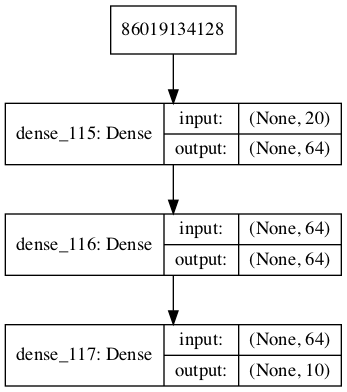

In [22]:
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=128,verbose = 1,validation_split=0.25)

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 0s 112us/sample - loss: 2.3544 - acc: 0.1080 - val_loss: 2.3153 - val_acc: 0.0880
Epoch 2/100
750/750 [==============================] - 0s 11us/sample - loss: 2.3180 - acc: 0.1053 - val_loss: 2.3069 - val_acc: 0.0760
Epoch 3/100
750/750 [==============================] - 0s 9us/sample - loss: 2.3009 - acc: 0.1107 - val_loss: 2.3089 - val_acc: 0.0800
Epoch 4/100
750/750 [==============================] - 0s 9us/sample - loss: 2.2907 - acc: 0.1227 - val_loss: 2.3131 - val_acc: 0.0880
Epoch 5/100
750/750 [==============================] - 0s 9us/sample - loss: 2.2885 - acc: 0.1227 - val_loss: 2.3151 - val_acc: 0.1000
Epoch 6/100
750/750 [==============================] - 0s 11us/sample - loss: 2.2851 - acc: 0.1253 - val_loss: 2.3152 - val_acc: 0.0760
Epoch 7/100
750/750 [==============================] - 0s 11us/sample - loss: 2.2826 - acc: 0.1240 - val_loss: 2.3160 - val_acc: 0.0720
Epoc

In [23]:
score = model.evaluate(x_test, y_test, batch_size=128)

100/100 [==============================] - 0s 10us/sample - loss: 2.3971 - acc: 0.0900


In [24]:
type(history.history)

dict

In [25]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

#### Training history visualization
The `fit()` method on a Keras Model returns a `History` object. The `History.history` attribute is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable). Here is a simple example using matplotlib to generate loss & accuracy plots for training & validation:

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

################ just for fixing some problems in MacOs
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
###############

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

KeyError: 'accuracy'

### MLP for binary classification:

In [28]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [29]:
# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

In [3]:
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

[ERROR] 2022-10-20T15:13:11.498047Z, 1121, 1121, "Error performing handshake with server 10.183.3.126:55002"
[ERROR] 2022-10-20T15:13:11.498074Z, 1121, 1121, "Unable to connect to server. Initial handshake failed."
[ERROR] 2022-10-20T15:13:11.498082Z, 1121, 1121, "Error establishing connection in generated_cuInitialize: Connection refused"
[ERROR] 2022-10-20T15:13:11.498089Z, 1121, 1121, "Communication error(s), check network connectivity"
2022-10-20 15:13:11.498146: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (101)
2022-10-20 15:13:11.498187: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ft-40011-40): /proc/driver/nvidia/version does not exist
2022-10-20 15:13:11.498561: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical o

In [30]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=128,verbose = 0,validation_split=0.25)

ValueError: A target array with shape (1000, 1) was passed for an output of shape (None, 10) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

In [31]:
score = model.evaluate(x_test, y_test, batch_size=128)
score

ValueError: A target array with shape (100, 1) was passed for an output of shape (None, 10) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

In [6]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

## Applications
Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

Weights are downloaded automatically when instantiating a model. They are stored at `~/.keras/models/`.

### Example : image classification using ResNet50 model

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

RNmodel = ResNet50(weights='imagenet')

In [ ]:
!pip install pillow # if you don't have it installed

In [ ]:
img_path = 'images/indri.jpg' # can change to cat or elephant
img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.show()

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
x.shape

In [ ]:
preds = RNmodel.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

## About Keras models

In [ ]:
#Use for example MLperceptron

model.summary()

In [ ]:
print(20*64+64)
print(64*64+64)
print(64*1+1)

In [ ]:
len(model.layers)

In [ ]:
print(model.inputs)
print(model.outputs)

In [ ]:
W = model.get_weights() 

for l in range(2*len(model.layers)):
    print(np.shape(W[l]))

In [ ]:
#change te value of the weights
model.set_weights(W)   

In [ ]:
model.save_weights('outputs/weight_backup')
model.load_weights('outputs/weight_backup', by_name=False)

By default, the architecture is expected to be unchanged. To load weights into a different architecture (with some layers in common), use `by_name=True` to load only those layers with the same name.

## Sequential model methods

### Compile

` compile(optimizer, loss=None, metrics=None, 
        loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None) `
        
Configures the model for training.

#### Arguments
        
* **optimizer** : String (name of optimizer) or optimizer instance. See optimizers.
* **loss** : String (name of objective function) or objective function. See losses. If the model has multiple outputs, you can use a different loss on each output by passing a dictionary or a list of losses. The loss value that will be minimized by the model will then be the sum of all individual losses.
* **metrics**: List of metrics to be evaluated by the model during training and testing. Typically you will use `metrics=['accuracy']`. To specify different metrics for different outputs of a multi-output model, you could also pass a dictionary, such as `metrics={'output_a': 'accuracy'}`.

### Fit

`fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, validation_split=0.0, 
     validation_data=None, shuffle=True, class_weight=None, sample_weight=None, callbacks=None,
     initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)`
     
Trains the model for a given number of epochs (iterations on a dataset).

#### Arguments

* **x**: Numpy array of training data (if the model has a single input), or list of Numpy arrays (if the model has multiple inputs). 
* **y**: Numpy array of target (label) data (if the model has a single output), or list of Numpy arrays (if the model has multiple outputs). 
* **batch_size**: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32.
* **epochs**: Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. Note that in conjunction with initial_epoch,  epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.
* **verbose**: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
* **validation_split**: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.

#### Return
A `History` object. Its `History.history` attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

## About Keras layers

In [ ]:
layer = model.layers[1]
W = layer.get_weights()

print(np.shape(W[0]))
print(np.shape(W[1]))

In [ ]:
len(W)

In [ ]:
layer.set_weights(W)

In [ ]:
print(layer.input_shape)
layer.input

In [ ]:
print(layer.output_shape)
layer.output

### Dense

`keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
                     bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
                     activity_regularizer=None, kernel_constraint=None, bias_constraint=None)`

Just your regular densely-connected NN layer.

Dense implements the operation: 
$$ out = \Phi (W\cdot in  + b) $$
where $\Phi(.)$ is the element-wise activation function passed as the activation argument, kernel $W$ is a weights matrix created by the layer, and $b$ is a bias vector created by the layer (only applicable if use_bias is True).

#### Arguments

* **units**: Positive integer, dimensionality of the output space.
* **activation**: Activation function to use (see activations). If you don't specify anything, no activation is applied (ie. "linear" activation: $\Phi(x) = x$).
* **use_bias**: Boolean, whether the layer uses a bias vector.
* **kernel_initializer**: Initializer for the kernel weights matrix.
* **bias_initializer**: Initializer for the bias vector.
* **kernel_regularizer**: Regularizer function applied to the kernel weights matrix.
* **bias_regularizer**: Regularizer function applied to the bias vector.
* **kernel_constraint**: Constraint function applied to the kernel weights matrix.
* **bias_constraint**: Constraint function applied to the bias vector.


## Usage of loss functions

A loss function (or objective function, or optimization score function) is one of the two parameters required to compile a model:

`model.compile(loss='mean_squared_error', optimizer='sgd')`

from keras import losses

`model.compile(loss=losses.mean_squared_error, optimizer='sgd')`

You can either pass the name of an existing loss function, or pass a symbolic function that returns a scalar for each data-point and takes the following two arguments:

- **y_true**: True labels. TensorFlow/Theano tensor.
- **y_pred**: Predictions. TensorFlow/Theano tensor of the same shape as y_true.

The actual optimized objective is the mean of the output array across all datapoints.

## Available loss functions

In [ ]:
import tensorflow.keras.backend as K
import tensorflow as tf
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

x = tf.Variable([2,2])
y = tf.Variable([3,2])
print (mean_squared_error(x,y))

In [ ]:
def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                            K.epsilon(),
                                            None))
    return 100. * K.mean(diff, axis=-1)

In [ ]:
def logcosh(y_true, y_pred):
    """Logarithm of the hyperbolic cosine of the prediction error.
    `log(cosh(x))` is approximately equal to `(x ** 2) / 2` for small `x` and
    to `abs(x) - log(2)` for large `x`. This means that 'logcosh' works mostly
    like the mean squared error, but will not be so strongly affected by the
    occasional wildly incorrect prediction.
    # Arguments
        y_true: tensor of true targets.
        y_pred: tensor of predicted targets.
    # Returns
        Tensor with one scalar loss entry per sample.
    """
    def _logcosh(x):
        return x + K.softplus(-2. * x) - K.log(2.)
    return K.mean(_logcosh(y_pred - y_true), axis=-1)

In [ ]:
def kullback_leibler_divergence(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    return K.sum(y_true * K.log(y_true / y_pred), axis=-1)

In [ ]:
def categorical_crossentropy(y_true, y_pred):
    return K.categorical_crossentropy(y_true, y_pred)

In [ ]:
def cosine_proximity(y_true, y_pred):
    y_true = K.l2_normalize(y_true, axis=-1)
    y_pred = K.l2_normalize(y_pred, axis=-1)
    return -K.sum(y_true * y_pred, axis=-1)

### Aliases.

- mse = MSE = mean_squared_error
- mae = MAE = mean_absolute_error
- mape = MAPE = mean_absolute_percentage_error
- msle = MSLE = mean_squared_logarithmic_error
- kld = KLD = kullback_leibler_divergence
- cosine = cosine_proximity

## Usage of metrics

A metric is a function that is used to judge the performance of your model. Metric functions are to be supplied in the metrics parameter when a model is compiled.

`model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae', 'acc'])`

from keras import metrics

`model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[metrics.mae, metrics.categorical_accuracy])`

A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model. You may use any of the loss functions as a metric function.

You can either pass the name of an existing metric, or pass a  symbolic function (see Custom metrics).

#### Arguments

- **y_true**: True labels. Theano/TensorFlow tensor.
- **y_pred**: Predictions. Theano/TensorFlow tensor of the same shape as y_true.

#### Returns
Single tensor value representing the mean of the output array across all datapoints.

## Available metrics

### binary_accuracy
`keras.metrics.binary_accuracy(y_true, y_pred)`
### categorical_accuracy
`keras.metrics.categorical_accuracy(y_true, y_pred)`

## Custom metrics
Custom metrics can be passed at the compilation step. The function would need to take `(y_true, y_pred)` as arguments and return a single tensor value.


In [ ]:
import tensorflow.keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])

## Usage of activations

Activations can either be used through an `Activation layer`, or through the activation argument supported by all forward layers:

from keras.layers import Activation, Dense

`model.add(Dense(64))
model.add(Activation('tanh'))`

This is equivalent to:

`model.add(Dense(64, activation='tanh'))`

You can also pass an element-wise TensorFlow/Theano/CNTK function as an activation:

from keras import backend as K

`model.add(Dense(64, activation=K.tanh))`

### Available activations

#### softmax
`keras.activations.softmax(x, axis=-1)`

#### elu
`keras.activations.elu(x, alpha=1.0)`

The exponential linear activation: 
$$ \begin{cases} & x \ \  x > 0\\  &\alpha  \ (\exp(x)-1) \ \  x < 0.  \end{cases}$$


#### softplus
`keras.activations.softplus(x)`

The softplus activation: $$\log(\exp(x) + 1).$$

#### softsign
`keras.activations.softsign(x)`

The softsign activation: $$\frac{x}{(|x| + 1)}.$$

#### relu
`keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)`

With default values, it returns element-wise $$\max(x, 0).$$
Otherwise, it follows: 
$$ f(x) = \begin{cases} & \hbox{max_value} \ \  x \leq \hbox{max_value},\\ & x \ \  \hbox{threshold} \leq x < \hbox{max_value},\\ & \alpha (x - \hbox{threshold}) \ \ \hbox{otherwise}. \end{cases}$$

#### tanh
`keras.activations.tanh(x)`

#### sigmoid
`keras.activations.sigmoid(x)`

#### linear
`keras.activations.linear(x)`
Linear (i.e. identity) activation function.

<img src="images/sigmoid_tanh.png" width="400">

<img src="images/relu_variants.png" width="400">

## Usage of optimizers

An optimizer is one of the two arguments required for compiling a Keras model:

In [ ]:
from tensorflow.keras import optimizers

model = Sequential()
model.add(Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

You can either instantiate an optimizer before passing it to `model.compile()` , as in the above example, or you can call it by its name. In the latter case, the default parameters for the optimizer will be used.

In [ ]:
# pass optimizer by name: default parameters will be used
model.compile(loss='mean_squared_error', optimizer='adam')

### SGD
`keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)`
Stochastic gradient descent optimizer.

Includes support for momentum, learning rate decay, and Nesterov momentum.

#### Arguments

- **lr**: float >= 0. Learning rate.
- **momentum**: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
- **decay**: float >= 0. Learning rate decay over each update.
- **nesterov**: boolean. Whether to apply Nesterov momentum.


# MPG Dataset example using Tensorflow-Keras

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Load the DataSet.
data = pd.read_csv('data/MPG.csv',index_col='car name')
data.head()

In [ ]:
data.info()

In [ ]:
factors = ['horsepower','cylinders','displacement','acceleration','weight','origin','model year','Power_to_weight']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X[factors] = MinMaxScaler().fit_transform(X[factors])

In [ ]:
X.shape

In [ ]:
model = Sequential()

#linear regression
#model.add(Dense(1, activation='linear',input_dim = 8))

#deep linear networks
#model.add(Dense(4, activation='linear', input_dim=8))
#model.add(Dense(1, activation='linear'))

#deep non linear network
model.add(Dense(20, activation='relu', input_dim=8))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
#sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='mse', optimizer='adam') 

In [ ]:
history = model.fit(x=X.values, y=y.values, epochs=50, verbose=1,batch_size=30,validation_split=0.2)

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim([0,50])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_predicted = model.predict(X.values)

In [ ]:
score = model.evaluate(X.values, y.values)
score

In [ ]:
var = 'horsepower'
plt.scatter(X[var],y, label='true')
plt.scatter(X[var],y_predicted, label='predicted')
plt.legend()
plt.show()

# Financial time series forecasting with Pytorch

In [1]:
# !pip install yfinance

In [1]:
import yfinance as yf
import numpy as np

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import (Dataset, TensorDataset, 
                              DataLoader, Subset)

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

print(torch.__version__)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

1.13.0+cpu


Define parameters:

In [2]:
# data
TICKER = 'ANF'
START_DATE = '2010-01-02'
END_DATE = '2019-12-31'
N_LAGS = 3

# neural network 
VALID_SIZE = 12
BATCH_SIZE = 5
N_EPOCHS = 1000

Download and prepare the data:

In [3]:
df = yf.download(TICKER, 
                 start=START_DATE, 
                 end=END_DATE,
                 progress=False)

df = df.resample('M').last()
df_mean = yf.download(TICKER, 
                 start=START_DATE, 
                 end=END_DATE,
                 progress=False)

prices = df['Adj Close'].values

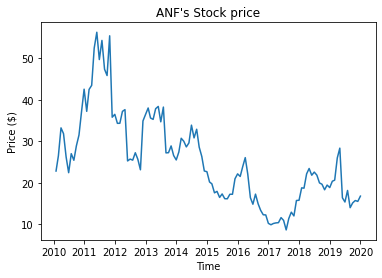

In [4]:
fig, ax = plt.subplots()

ax.plot(df.index, prices)
ax.set(title=f"{TICKER}'s Stock price", 
       xlabel='Time', 
       ylabel='Price ($)');

Define a function for transforming time series into a dataset for the MLP:

In [5]:
def create_input_data(series, n_lags=1):
    '''
    Function for transforming time series into input acceptable by a multilayer perceptron.
    
    Parameters
    ----------
    series : np.array
        The time series to be transformed
    n_lags : int
        The number of lagged observations to consider as features

    Returns
    -------
    X : np.array
        Array of features
    y : np.array
        Array of target
    '''
    X, y = [], []

    for step in range(len(series) - n_lags):
        end_step = step + n_lags
        X.append(series[step:end_step])
        y.append(series[end_step])
    return np.array(X), np.array(y)

Transform the considered time series into input for the MLP:

In [6]:
X, y = create_input_data(prices, N_LAGS)

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().unsqueeze(dim=1)

Create training and validation sets:

In [7]:
valid_ind = len(X) - VALID_SIZE

dataset = TensorDataset(X_tensor, y_tensor)

train_dataset = Subset(dataset, list(range(valid_ind)))
valid_dataset = Subset(dataset, list(range(valid_ind, len(X))))

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE)
valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE)

Inspect the observations from the first batch:

In [8]:
next(iter(train_loader))[0]

tensor([[22.8548, 26.5230, 33.2376],
        [26.5230, 33.2376, 31.8466],
        [33.2376, 31.8466, 26.2224],
        [31.8466, 26.2224, 22.4606],
        [26.2224, 22.4606, 27.0347]])

In [9]:
next(iter(train_loader))[1]

tensor([[31.8466],
        [26.2224],
        [22.4606],
        [27.0347],
        [25.4489]])

Check the size of the datasets:

In [11]:
print(f'Size of datasets - training: {len(train_loader.dataset)} | validation: {len(valid_loader.dataset)}')

Size of datasets - training: 105 | validation: 12


Use naive forecast as a benchmark and evaluate the performance:

In [12]:
naive_pred = prices[len(prices) - VALID_SIZE - 1:-1]
y_valid = prices[len(prices) - VALID_SIZE:]

naive_mse = mean_squared_error(y_valid, naive_pred)
naive_rmse = np.sqrt(naive_mse)
print(f"Naive forecast - MSE: {naive_mse:.2f}, RMSE: {naive_rmse:.2f}")

Naive forecast - MSE: 17.37, RMSE: 4.17


Linear Regression's forecast - MSE: 16.74, RMSE: 4.09
Linear Regression's coefficients: [-0.0015094   0.16308345  0.78466938]


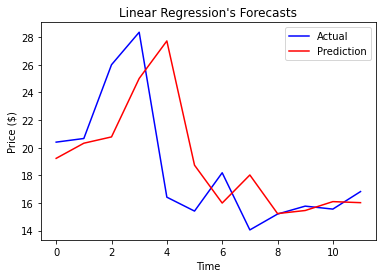

In [14]:
# Optional: Testing Linear Regression

from sklearn.linear_model import LinearRegression

X_train = X[:valid_ind, ]
y_train = y[:valid_ind]

X_valid = X[valid_ind:, ]
y_valid = y[valid_ind:]

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_valid)
lr_mse = mean_squared_error(y_valid, y_pred)
lr_rmse = np.sqrt(lr_mse)
print(f"Linear Regression's forecast - MSE: {lr_mse:.2f}, RMSE: {lr_rmse:.2f}")
print(f"Linear Regression's coefficients: {lin_reg.coef_}")

fig, ax = plt.subplots()

ax.plot(y_valid, color='blue', label='Actual')
ax.plot(y_pred, color='red', label='Prediction')

ax.set(title="Linear Regression's Forecasts", 
       xlabel='Time', 
       ylabel='Price ($)')
ax.legend();

Define the network's architecture:

In [15]:
class MLP(nn.Module):
   
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, 8)
        self.linear2 = nn.Linear(8, 4)
        self.linear3 = nn.Linear(4, 1)
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear3(x)
        return x

Instantiate the model, the loss function and the optimizer:

In [16]:
# set seed for reproducibility
torch.manual_seed(42)

model = MLP(N_LAGS).to(device) 
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
model

MLP(
  (linear1): Linear(in_features=3, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=4, bias=True)
  (linear3): Linear(in_features=4, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

10. Train the network:

In [21]:
PRINT_EVERY = 50
train_losses, valid_losses = [], []

for epoch in range(N_EPOCHS):
    running_loss_train = 0
    running_loss_valid = 0

    model.train()
    
    for x_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_hat = model(x_batch)
        loss = loss_fn(y_batch, y_hat)
        loss.backward()
        optimizer.step()
        running_loss_train += loss.item() * x_batch.size(0)
        
    epoch_loss_train = running_loss_train / len(train_loader.dataset)
    train_losses.append(epoch_loss_train)

    with torch.no_grad():
        
        model.eval()
        
        for x_val, y_val in valid_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            y_hat = model(x_val)
            loss = loss_fn(y_val, y_hat)
            running_loss_valid += loss.item() * x_val.size(0)
            
        epoch_loss_valid = running_loss_valid / len(valid_loader.dataset)
            
        if epoch > 0 and epoch_loss_valid < min(valid_losses):
            best_epoch = epoch
            torch.save(model.state_dict(), './outputs/mlp_checkpoint.pth')
            
        valid_losses.append(epoch_loss_valid)

    if epoch % PRINT_EVERY == 0:
        print(f"<{epoch}> - Train. loss: {epoch_loss_train:.2f} \t Valid. loss: {epoch_loss_valid:.2f}")
        
print(f'Lowest loss recorded in epoch: {best_epoch}')

<0> - Train. loss: 806.78 	 Valid. loss: 336.76


RuntimeError: Parent directory ./outputs does not exist.

Plot the losses over epochs:

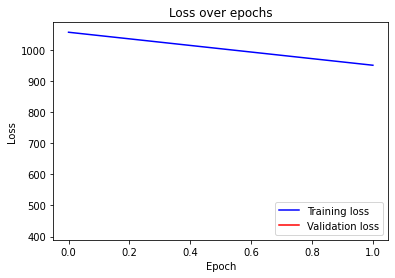

In [20]:
train_losses = np.array(train_losses)
valid_losses = np.array(valid_losses)

fig, ax = plt.subplots()

ax.plot(train_losses, color='blue', label='Training loss')
ax.plot(valid_losses, color='red', label='Validation loss')

ax.set(title='Loss over epochs', 
       xlabel='Epoch', 
       ylabel='Loss')
ax.legend()

# plt.tight_layout()
# plt.savefig('images/ch10_im7.png')
plt.show()

Load the best model (with the lowest validation loss):

In [ ]:
state_dict = torch.load('outputs/mlp_checkpoint.pth')
model.load_state_dict(state_dict)

13. Obtain the predictions:

In [23]:
y_pred, y_valid= [], []

with torch.no_grad():

    model.eval()
    
    for x_val, y_val in valid_loader:
        x_val = x_val.to(device)    
        y_pred.append(model(x_val))
        y_valid.append(y_val)
        
y_pred = torch.cat(y_pred).numpy().flatten()
y_valid = torch.cat(y_valid).numpy().flatten()

14. Evaluate the predictions:

MLP's forecast - MSE: 15.48, RMSE: 3.93


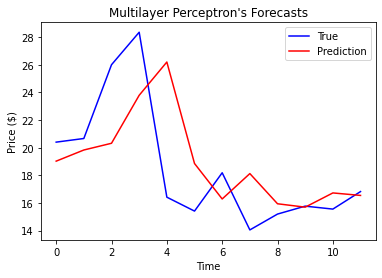

In [24]:
mlp_mse = mean_squared_error(y_valid, y_pred)
mlp_rmse = np.sqrt(mlp_mse)
print(f"MLP's forecast - MSE: {mlp_mse:.2f}, RMSE: {mlp_rmse:.2f}")

fig, ax = plt.subplots()

ax.plot(y_valid, color='blue', label= 'True')
ax.plot(y_pred, color='red', label='Prediction')

ax.set(title="Multilayer Perceptron's Forecasts", 
       xlabel='Time', 
       ylabel='Price ($)')
ax.legend()

# plt.tight_layout()
# plt.savefig('images/ch10_im8.png')
plt.show()

## A sequential approach to defining the network's architecture

Below we define the same network as we have already used before in this recipe:

In [ ]:
model = nn.Sequential(
    nn.Linear(3, 8),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(4, 1)
)

model

## Additional material : Multi-period forecast

Define a modified function for creating a dataset for the MLP:

In [ ]:
def create_input_data(series, n_lags=1, n_leads=1):
    '''
    Function for transforming time series into input acceptable by a multilayer perceptron.
    
    Parameters
    ----------
    series : np.array
        The time series to be transformed
    n_lags : int
        The number of lagged observations to consider as features
    n_leads : int
        The number of future periods we want to forecast for
        
    Returns
    -------
    X : np.array
        Array of features
    y : np.array
        Array of target
    '''
    X, y = [], []

    for step in range(len(series) - n_lags - n_leads + 1):
        end_step = step + n_lags
        forward_end = end_step + n_leads
        X.append(series[step:end_step])
        y.append(series[end_step:forward_end])
    return np.array(X), np.array(y)

Create features and target from the time series of prices:

In [ ]:
# parameters for the dataset
N_LAGS = 3
N_FUTURE = 2

X, y = create_input_data(prices, N_LAGS, N_FUTURE)

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

Create training and validation sets:

In [ ]:
dataset = TensorDataset(X_tensor, y_tensor)

valid_ind = len(X) - VALID_SIZE + (N_FUTURE - 1)

train_dataset = Subset(dataset, list(range(valid_ind)))
valid_dataset = Subset(dataset, list(range(valid_ind, len(X))))

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE)
valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE)

Define the MLP for multi-period forecasting:

In [ ]:
class MLP(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, 16)
        self.linear2 = nn.Linear(16, 8)
        self.linear3 = nn.Linear(8, output_size)
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear3(x)
        return x  

Instantiate the model, the loss function and the optimizer:

In [ ]:
# set seed for reproducibility
torch.manual_seed(42)

model = MLP(N_LAGS, N_FUTURE).to(device) 
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Train the network:

In [ ]:
PRINT_EVERY = 50
train_losses, valid_losses = [], []

for epoch in range(N_EPOCHS):
    running_loss_train = 0
    running_loss_valid = 0

    model.train()
    
    for x_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_hat = model(x_batch)
        loss = loss_fn(y_batch, y_hat)
        loss.backward()
        optimizer.step()
        running_loss_train += loss.item() * x_batch.size(0)
        
    epoch_loss_train = running_loss_train / len(train_loader.dataset)
    train_losses.append(epoch_loss_train)

    with torch.no_grad():
        
        model.eval()
        
        for x_val, y_val in valid_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            y_hat = model(x_val)
            loss = loss_fn(y_val, y_hat)
            running_loss_valid += loss.item() * x_val.size(0)
            
        epoch_loss_valid = running_loss_valid / len(valid_loader.dataset)
            
        if epoch > 0 and epoch_loss_valid < min(valid_losses):
            best_epoch = epoch
            torch.save(model.state_dict(), './outputs/mlp_checkpoint_2.pth')
            
        valid_losses.append(epoch_loss_valid)

    if epoch % PRINT_EVERY == 0:
        print(f"<{epoch}> - Train. loss: {epoch_loss_train:.2f} \t Valid. loss: {epoch_loss_valid:.2f}")
        
print(f'Lowest loss recorded in epoch: {best_epoch}')

Plot the training and validation losses:

In [ ]:
train_losses = np.array(train_losses)
valid_losses = np.array(valid_losses)

fig, ax = plt.subplots()

ax.plot(train_losses, color='blue', label='Training loss')
ax.plot(valid_losses, color='red', label='Validation loss')

ax.set(title="Loss over epochs", 
       xlabel='Epoch', 
       ylabel='Loss')
ax.legend();

Load the best model (with the lowest validation loss):

In [ ]:
state_dict = torch.load('outputs/mlp_checkpoint_2.pth')
model.load_state_dict(state_dict)

Obtain predictions:

In [ ]:
y_pred = []

with torch.no_grad():
    
    model.eval()
        
    for x_val, y_val in valid_loader:
        x_val = x_val.to(device)
        yhat = model(x_val)
        y_pred.append(yhat)
               
y_pred = torch.cat(y_pred).numpy()

Plot the predictions:

In [ ]:
fig, ax = plt.subplots()

ax.plot(y_valid, color='blue', label='Actual')

for i in range(len(y_pred)):
    if i == 0:
        ax.plot(np.array([i, i + 1]), y_pred[i], color='red', label='Prediction')
    else:
        ax.plot(np.array([i, i + 1]), y_pred[i], color='red')

ax.set(title="MLP's Multi-period Forecasts", 
       xlabel='Time', 
       ylabel='Price ($)')
ax.legend()

# plt.tight_layout()
# plt.savefig('images/ch10_im9.png')
plt.show()